In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
cancer = load_breast_cancer()

# Univariate Stats

- `f_classif`
- `f_regression`
- `SelectKBest`
- `SelectPercentile`

In [3]:
noise = np.random.normal(size = (len(cancer.data), 50))

noise

array([[ 0.75532783, -0.05297585, -1.178924  , ..., -0.35386787,
        -0.10363523, -0.46353421],
       [-1.74932512,  0.31978265, -1.19401776, ..., -0.61339222,
        -0.44569099, -1.02967926],
       [-1.08070284, -0.02307921,  0.23357834, ..., -0.54598692,
         0.16795895,  1.27543608],
       ...,
       [ 0.66807729, -1.31577053,  0.72368031, ..., -0.31851856,
        -0.42352272, -0.80613569],
       [ 0.14060538,  0.13351687, -0.82458406, ...,  1.99336809,
        -0.0343488 , -1.27925535],
       [-0.8893242 , -0.25565016, -0.72728688, ...,  0.4396819 ,
         0.31507229,  1.18033312]])

In [4]:
X_w_noise = np.hstack([cancer.data, noise])

X_w_noise

array([[ 1.79900000e+01,  1.03800000e+01,  1.22800000e+02, ...,
        -3.53867868e-01, -1.03635227e-01, -4.63534210e-01],
       [ 2.05700000e+01,  1.77700000e+01,  1.32900000e+02, ...,
        -6.13392223e-01, -4.45690988e-01, -1.02967926e+00],
       [ 1.96900000e+01,  2.12500000e+01,  1.30000000e+02, ...,
        -5.45986919e-01,  1.67958955e-01,  1.27543608e+00],
       ...,
       [ 1.66000000e+01,  2.80800000e+01,  1.08300000e+02, ...,
        -3.18518565e-01, -4.23522718e-01, -8.06135690e-01],
       [ 2.06000000e+01,  2.93300000e+01,  1.40100000e+02, ...,
         1.99336809e+00, -3.43487983e-02, -1.27925535e+00],
       [ 7.76000000e+00,  2.45400000e+01,  4.79200000e+01, ...,
         4.39681899e-01,  3.15072292e-01,  1.18033312e+00]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, test_size = 0.5)

In [6]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x1a1341e1e0>)

In [8]:
#transform training
X_train_selected = select.transform(X_train)

In [9]:
X_train.shape

(284, 80)

In [10]:
X_train_selected.shape

(284, 40)

In [13]:
mask = select.get_support()

In [14]:
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False  True False False  True False False  True False False  True
 False False False  True False  True  True False False  True False False
 False False False  True False False False False False  True False  True
 False False False False  True False False False]


Text(0.5,0,'Sample index')

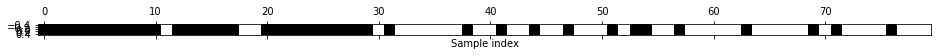

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
#black is true 
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('Sample index')

### Compare performance

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X_test_selected = select.transform(X_test)

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#all features
lr.score(X_test, y_test)

0.9228070175438596

In [21]:
lr.fit(X_train_selected, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#selected features
lr.score(X_train_selected, y_train)

0.954225352112676

In [23]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [24]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
import pandas as pd

In [26]:
sex_dum = pd.get_dummies(titanic.sex, drop_first=True)

In [27]:
sex_dum.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
titanic['sex_dum'] = sex_dum

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_dum
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [30]:
titanic = titanic.dropna()
X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_dum']]
y = titanic.survived
select.fit(X, y)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x1a1341e1e0>)

In [31]:
select.get_support()

array([False,  True, False, False,  True,  True])

In [32]:
mask = select.get_support()

Text(0.5,0,'Sample index')

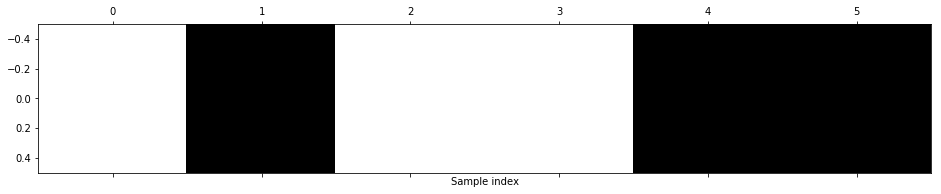

In [33]:
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('Sample index')

### Model Based Selection

In [34]:
from sklearn.feature_selection import SelectFromModel

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 100), threshold = 'median')

In [37]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold='median')

In [38]:
X_train_l1 = select.transform(X_train)

In [39]:
X_train.shape

(284, 80)

In [40]:
X_train_l1.shape

(284, 40)

Text(0.5,0,'Sample Index')

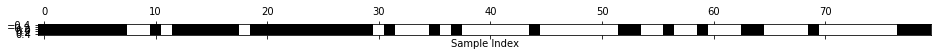

In [41]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample Index")

In [42]:
#performance
X_test_l1 = select.transform(X_test)

In [43]:
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)

In [44]:
score

0.9473684210526315

### Iterative Feature Selection

In [45]:
from sklearn.feature_selection import RFE

In [46]:
select = RFE(RandomForestClassifier(n_estimators = 100), n_features_to_select=40)

In [47]:
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

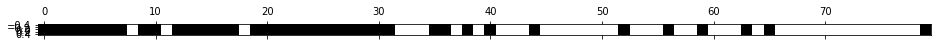

In [48]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')

In [49]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [50]:
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

In [51]:
score

0.9543859649122807

In [52]:
#use model from selections
select.score(X_test, y_test)

0.9508771929824561

In [53]:
from sklearn.datasets import load_wine

In [54]:
wine = load_wine()

In [55]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [56]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [57]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [58]:
select = RFE(RandomForestClassifier(n_estimators = 100), n_features_to_select=6)

In [59]:
select.fit(wine.data, wine.target)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
  n_features_to_select=6, step=1, verbose=0)

In [60]:
select.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

### PROBLEM


Using some educational datasets below, use the feature selection methods to implement a feature selection routine.  Be sure you can clearly state your problem: is it classification or regression and what is it that you are trying to predict?  Make a visualization to support your feature selection and discuss the results.

**EXAMPLE**

What are the most important factors leading to high 8th grade mathematics scores?


In [62]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("crvg-kn9f", limit=3000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [63]:
results_df.head()

,dbn,grade,level_3_or_higher_1,level_3_or_higher_2,number_tested,school_name,year
0,01M034,7,23,0.404,57,P.S. 034 Franklin D. Roosevelt,2014
1,01M034,7,11,0.262,42,P.S. 034 Franklin D. Roosevelt,2015
2,01M034,8,12,0.226,53,P.S. 034 Franklin D. Roosevelt,2014
3,01M034,8,14,0.241,58,P.S. 034 Franklin D. Roosevelt,2015
4,01M034,All Grades,75,0.278,270,P.S. 034 Franklin D. Roosevelt,2014


In [64]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 7 columns):
dbn                    2951 non-null object
grade                  2951 non-null object
level_3_or_higher_1    2947 non-null object
level_3_or_higher_2    2947 non-null object
number_tested          2947 non-null object
school_name            2951 non-null object
year                   2951 non-null object
dtypes: object(7)
memory usage: 161.5+ KB


In [65]:
math_scores = client.get("uqrh-uk4g", limit = 118000)

In [66]:
math_scores = pd.DataFrame.from_records(math_scores)

math_scores.head()

,dbn,demographic,grade,mean_scale_score,num_level_1,num_level_2,num_level_3,num_level_3_and_4,num_level_4,number_tested,pct_level_1,pct_level_2,pct_level_3,pct_level_3_and_4,pct_level_4,year
0,01M015,Asian,3,s,s,s,s,s,s,3,s,s,s,s,s,2006
1,01M015,Black,3,662,0,3,9,9,0,12,0,25,75,75,0,2006
2,01M015,Hispanic,3,670,1,8,10,15,5,24,4.2,33.3,41.7,62.5,20.8,2006
3,01M015,Asian,3,s,s,s,s,s,s,3,s,s,s,s,s,2007
4,01M015,Black,3,s,s,s,s,s,s,4,s,s,s,s,s,2007


In [67]:
math_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116731 entries, 0 to 116730
Data columns (total 16 columns):
dbn                  116731 non-null object
demographic          116731 non-null object
grade                116731 non-null object
mean_scale_score     96452 non-null object
num_level_1          116731 non-null object
num_level_2          116731 non-null object
num_level_3          116731 non-null object
num_level_3_and_4    116731 non-null object
num_level_4          116731 non-null object
number_tested        116731 non-null object
pct_level_1          116731 non-null object
pct_level_2          116731 non-null object
pct_level_3          116731 non-null object
pct_level_3_and_4    116731 non-null object
pct_level_4          116731 non-null object
year                 116731 non-null object
dtypes: object(16)
memory usage: 14.2+ MB


In [69]:
descr = pd.read_csv('data/exp_2016.csv')

In [70]:
descr.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 161 columns):
Adjusted Grade                                        object
New?                                                  object
Other Location Code in LCGMS                          object
School Name                                           object
SED Code                                              int64
Location Code                                         object
District                                              int64
Latitude                                              float64
Longitude                                             float64
Address (Full)                                        object
City                                                  object
Zip                                                   int64
Grades                                                object
Grade Low                                             object
Grade High                             

In [71]:
descr.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
